In [2]:
import os
print(os.getcwd())

C:\Users\Light


In [3]:
os.chdir("C:/Users/Light/OneDrive/Documents")

In [160]:
import pandas as pd

df = pd.read_csv("med.events.csv")  
pd.set_option("display.max_rows", None) 
pd.set_option("display.max_columns", None) 

print(df)  

      PATIENT_ID        DATE  PERDAY CATEGORY  DURATION
0              1  04/26/2033       4     medA        50
1              1  07/04/2033       4     medB        30
2              1  08/03/2033       4     medB        30
3              1  08/17/2033       4     medB        30
4              1  10/13/2033       4     medB        30
5              1  10/16/2033       4     medB        30
6              1  11/23/2033       4     medB        30
7              1  01/19/2034       4     medB        30
8              1  02/08/2034       4     medB        30
9              1  03/08/2034       4     medB        30
10             1  04/08/2034       4     medB        30
11             1  05/10/2034       2     medB        30
12             1  05/29/2034       2     medB        30
13             1  06/28/2034       2     medB        30
14             1  07/19/2034       2     medB        30
15             1  08/31/2034       2     medB        30
16             1  09/14/2034       2     medB   

In [204]:
import pandas as pd

print('Converting Categorical Values Into Numerical Values')

df = pd.read_csv("med.events.csv")

df['CATEGORY'] = df['CATEGORY'].map({'medA': 0, 'medB': 1})

df_selected = df[['PATIENT_ID', 'PERDAY', 'CATEGORY', 'DURATION']]

print(df_selected)



Converting Categorical Values Into Numerical Values
      PATIENT_ID  PERDAY  CATEGORY  DURATION
0              1       4         0        50
1              1       4         1        30
2              1       4         1        30
3              1       4         1        30
4              1       4         1        30
5              1       4         1        30
6              1       4         1        30
7              1       4         1        30
8              1       4         1        30
9              1       4         1        30
10             1       4         1        30
11             1       2         1        30
12             1       2         1        30
13             1       2         1        30
14             1       2         1        30
15             1       2         1        30
16             1       2         1        30
17             1       2         1        30
18             1       2         1        30
19             1       2         1        30
20 

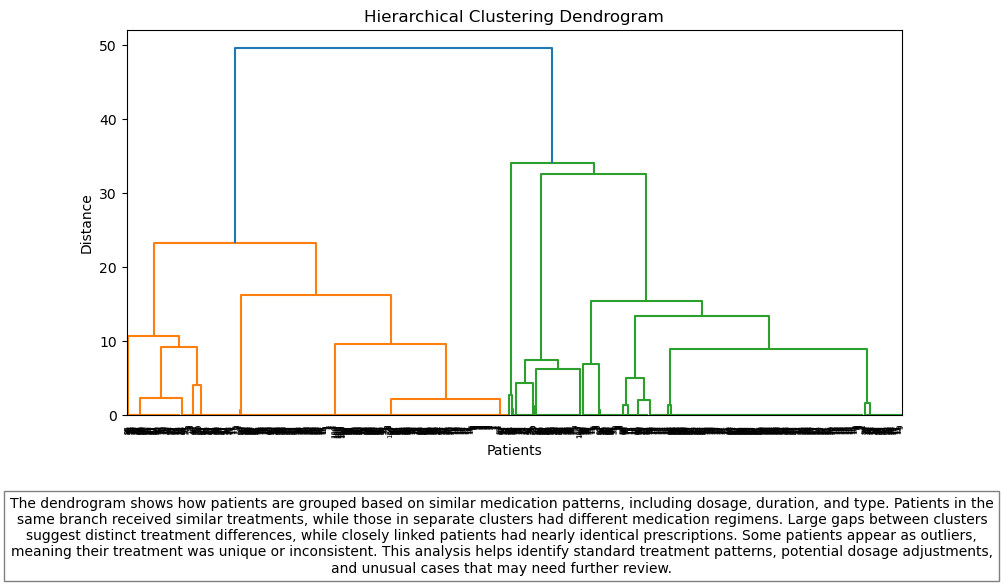

In [203]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def hierarchical_clustering_dendrogram(file_path, category_mapping={'medA': 0, 'medB': 1}):
    
    df = pd.read_csv(file_path)

    df['CATEGORY'] = df['CATEGORY'].map(category_mapping)

    df_selected = df[['PATIENT_ID', 'PERDAY', 'CATEGORY', 'DURATION']]

    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_selected[['PERDAY', 'CATEGORY', 'DURATION']])

    linked = sch.linkage(df_scaled, method='ward')

    plt.figure(figsize=(10, 5))

    sch.dendrogram(linked, labels=df_selected['PATIENT_ID'].values, leaf_rotation=90)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Patients')
    plt.ylabel('Distance')

    conclusion_text = (
        "The dendrogram shows how patients are grouped based on similar medication patterns, including dosage, duration, and type. "
        "Patients in the same branch received similar treatments, while those in separate clusters had different medication regimens. "
        "Large gaps between clusters suggest distinct treatment differences, while closely linked patients had nearly identical prescriptions. "
        "Some patients appear as outliers, meaning their treatment was unique or inconsistent. "
        "This analysis helps identify standard treatment patterns, potential dosage adjustments, and unusual cases that may need further review."
    )

    plt.figtext(0.5, -0.2, conclusion_text, wrap=True, horizontalalignment='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

    plt.show()

hierarchical_clustering_dendrogram("med.events.csv")


In [163]:
from scipy.cluster.hierarchy import fcluster

num_clusters = fcluster(linked, 14, criterion='distance')
print("Estimated number of clusters:", len(set(num_clusters)))


Estimated number of clusters: 7


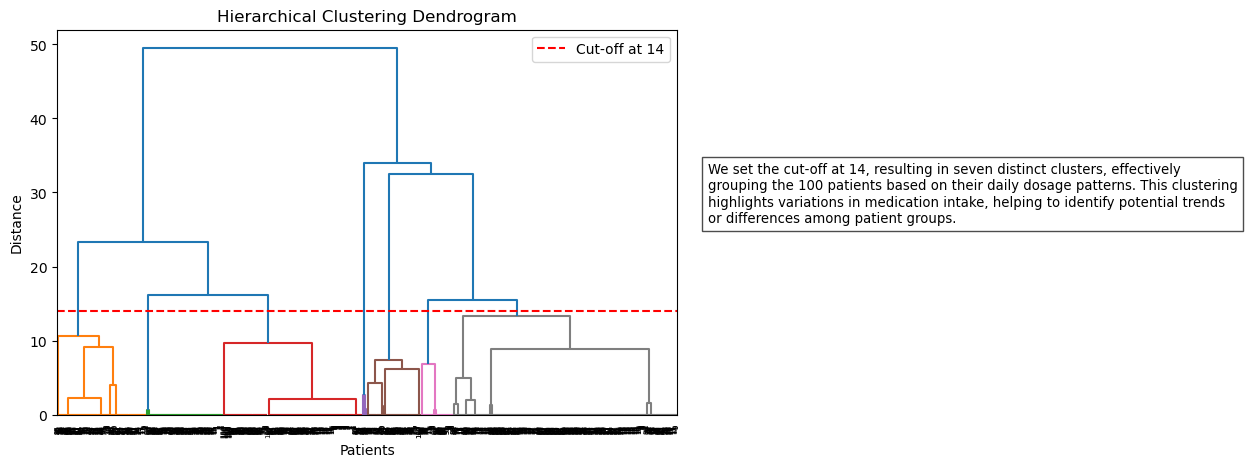

Cluster Assignments (First 10):
   PATIENT_ID  Cluster
0           1        7
1           1        3
2           1        3
3           1        3
4           1        3
5           1        3
6           1        3
7           1        3
8           1        3
9           1        3


In [202]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import fcluster

def hierarchical_clustering(file_path, category_mapping={'medA': 0, 'medB': 1}, distance_threshold=5):
    
    df = pd.read_csv(file_path)

    df['CATEGORY'] = df['CATEGORY'].map(category_mapping)

    df_selected = df[['PATIENT_ID', 'PERDAY', 'CATEGORY', 'DURATION']].copy()

    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_selected[['PERDAY', 'CATEGORY', 'DURATION']])

    linked = sch.linkage(df_scaled, method='ward')

    plt.figure(figsize=(8, 5))
    sch.dendrogram(linked, labels=df_selected['PATIENT_ID'].values, leaf_rotation=90, color_threshold=distance_threshold)
    plt.axhline(y=distance_threshold, color='r', linestyle='--', label=f'Cut-off at {distance_threshold}')
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Patients')
    plt.ylabel('Distance')
    plt.legend()

    text = (
        "We set the cut-off at 14, resulting in seven distinct clusters, effectively\n"
        "grouping the 100 patients based on their daily dosage patterns. This clustering\n"
        "highlights variations in medication intake, helping to identify potential trends\n"
        "or differences among patient groups."
    )

    plt.text(1.05, 0.5, text, transform=plt.gca().transAxes, fontsize=9.5,
             bbox=dict(facecolor='white', alpha=0.7))

    plt.show()

    df_selected['Cluster'] = fcluster(linked, distance_threshold, criterion='distance')

    print("Cluster Assignments (First 10):")
    print(df_selected[['PATIENT_ID', 'Cluster']].head(10))

    return df_selected  

df_clustered = hierarchical_clustering("med.events.csv", distance_threshold=14)


# 1. DOSAGE PATTERNS

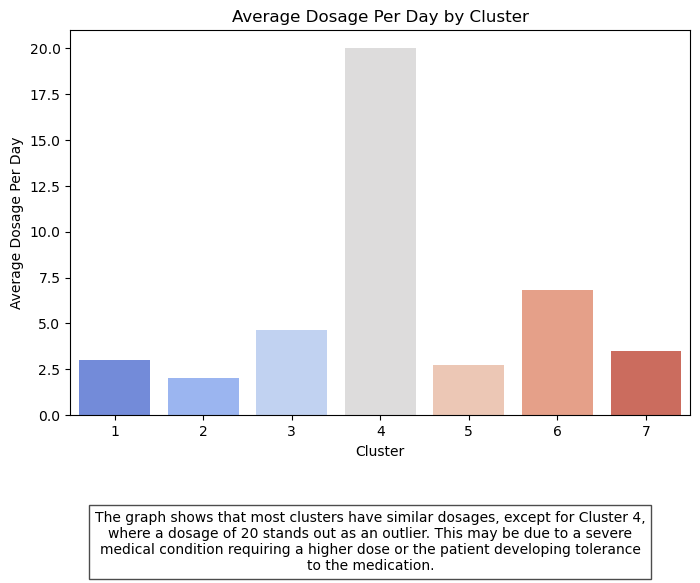

In [201]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_cluster_vs_dosage(df_clustered):
    
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Cluster', y='PERDAY', data=df_clustered, estimator=np.mean, palette='coolwarm', errorbar=None)

    plt.title("Average Dosage Per Day by Cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Average Dosage Per Day")

    text = (
        "The graph shows that most clusters have similar dosages, except for Cluster 4,\n"
        "where a dosage of 20 stands out as an outlier. This may be due to a severe\n"
        "medical condition requiring a higher dose or the patient developing tolerance\n"
        "to the medication."
    )

    plt.gcf().text(0.5, -0.2, text, fontsize=10, ha='center',
                   bbox=dict(facecolor='white', alpha=0.7))

    plt.show()


plot_cluster_vs_dosage(df_clustered)


In [186]:
import numpy as np
from scipy.stats import ttest_ind

def perform_t_test(df_clustered):
    
    cluster_4_dosage = df_clustered[df_clustered['Cluster'] == 4]['PERDAY']
    other_clusters_dosage = df_clustered[df_clustered['Cluster'] != 4]['PERDAY']

    t_stat, p_value = ttest_ind(cluster_4_dosage, other_clusters_dosage, equal_var=False)

    print(f"T-test results: t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")
    if p_value < 0.05:
        print("There is a significant difference in dosage between Cluster 4 and other clusters.")
    else:
        print("No significant difference in dosage between Cluster 4 and other clusters.")

perform_t_test(df_clustered)


T-test results: t-statistic = 367.219, p-value = 0.000
There is a significant difference in dosage between Cluster 4 and other clusters.


# 2. MEDICATION TYPE (medA vs. medB)

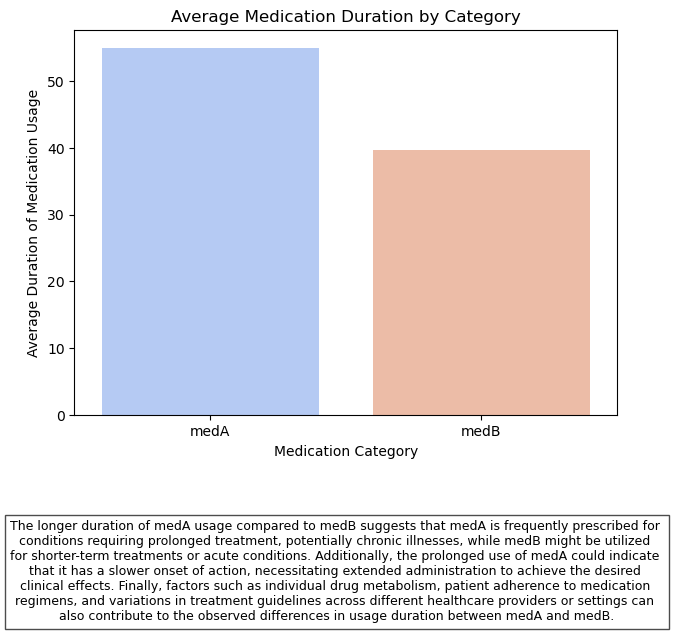

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt

def duration_category_barplot(df_selected):
    
    plt.figure(figsize=(7, 5))
    ax = sns.barplot(x='CATEGORY', y='DURATION', data=df_selected, estimator=np.mean, palette='coolwarm', errorbar=None)
    
    plt.title("Average Medication Duration by Category")
    plt.xlabel("Medication Category")
    plt.ylabel("Average Duration of Medication Usage")
    plt.xticks(ticks=[0, 1], labels=['medA', 'medB'])
    
    text = (
        "The longer duration of medA usage compared to medB suggests that medA is frequently prescribed for \n"
        "conditions requiring prolonged treatment, potentially chronic illnesses, while medB might be utilized \n"
        "for shorter-term treatments or acute conditions. Additionally, the prolonged use of medA could indicate \n"
        "that it has a slower onset of action, necessitating extended administration to achieve the desired \n"
        "clinical effects. Finally, factors such as individual drug metabolism, patient adherence to medication \n"
        "regimens, and variations in treatment guidelines across different healthcare providers or settings can \n"
        "also contribute to the observed differences in usage duration between medA and medB."
    )

    plt.gcf().text(0.5, -0.3, text, fontsize=9, ha='center', bbox=dict(facecolor='white', alpha=0.7))

    plt.show()


duration_category_barplot(df_selected)

### Summary & Conclusion  

The dendrogram analysis reveals that patients are grouped based on similar medication patterns, including dosage, duration, and type. A cut-off at 14 resulted in seven clusters, effectively categorizing 100 patients by their daily dosage patterns. Most clusters had similar dosages, except for Cluster 4, where a dosage of 20 emerged as an outlier, potentially due to a severe medical condition or medication tolerance.  

Additionally, medA was found to have a longer duration of use compared to medB, suggesting it is primarily prescribed for chronic conditions, while medB is more commonly used for short-term treatments. This difference may stem from medA’s slower onset of action, patient-specific factors like metabolism, adherence, or varying treatment guidelinestegies.reatment stra

### Comparison of Results

The k-means clustering effectively identified clusters of patients with short and long prescription intervals by analyzing the gaps in days between prescriptions. This approach is valuable for understanding medication adherence patterns and identifying potential issues like missed refills or inconsistent dosing. Hierarchical clustering, on the other hand, provided a flexible framework for exploring various potential cluster structures, uncovering insights such as identifying outliers, dosage patterns, and variations in the duration of medication use between different drugs. 

By combining these two clustering methods, you gained a comprehensive understanding of medication usage patterns and potential areas for improvement in patient care. This approach can be used to optimize treatment protocols, identify patients at risk of non-adherence, and develop more effective medication management strategies.